<strong>Importing Dataset

Dataset link:<a href="https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset"  >https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset</a>

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # Import Conv2D and MaxPool2D
from tensorflow.keras.layers import Flatten ,Dropout
from tensorflow.keras.layers import Dense # Import the Dense layer



%matplotlib inline

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
mydir = '/content/drive/My Drive/mydir'

In [ ]:
  !kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [00:19<00:00, 119MB/s]
100% 2.70G/2.70G [00:19<00:00, 149MB/s]


In [ ]:
!ls

new-plant-diseases-dataset.zip	sample_data


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/new-plant-diseases-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### <header><strong>Data Preparation for Training</strong></header>

<h1><strong>Traning Image Preprocessing</strong></h1>

In [ ]:
#Importing  training data with keras library
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 70295 files belonging to 38 classes.


In [ ]:
for images, labels in training_set.take(1):
    print(images.shape)  # Outputs: (32, 128, 128, 3)
    print(labels.shape)  # Outputs: (32, num_classes)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 38)
First image in the batch:
tf.Tensor(
[[[ 69.    59.25  71.  ]
  [ 63.25  52.75  65.25]
  [ 65.25  54.75  67.25]
  ...
  [ 76.75  69.25  83.75]
  [ 84.    78.    91.  ]
  [ 80.5   73.5   87.5 ]]

 [[125.   113.   127.  ]
  [126.25 114.25 128.25]
  [116.25 104.25 118.25]
  ...
  [145.5  137.5  152.5 ]
  [166.5  158.5  173.5 ]
  [161.25 153.25 168.25]]

 [[141.25 129.25 143.25]
  [125.75 113.75 127.75]
  [150.75 138.75 152.75]
  ...
  [150.   141.   158.  ]
  [158.5  149.5  166.5 ]
  [161.25 152.25 169.25]]

 ...

 [[150.75 139.75 156.75]
  [136.75 125.75 142.75]
  [143.25 132.25 149.25]
  ...
  [157.5  148.5  165.5 ]
  [159.25 150.25 167.25]
  [158.5  149.5  166.5 ]]

 [[149.25 138.25 155.25]
  [152.5  141.5  158.5 ]
  [163.5  152.5  169.5 ]
  ...
  [166.75 157.75 174.75]
  [158.   149.   166.  ]
  [166.   157.   174.  ]]

 [[176.   165.   182.  ]
  [165.   154.   171.  ]
  [150.25 139.25 156.25]
  ...
  [160.5  151.5  168.5 ]
  [154.75 145.75 162.75]
  [159.  

<p><h1>Explanation</h1>(32, 38), this indicates that your dataset has 38 classes. Each label in the batch is represented as a one-hot encoded vector of length 38, where each vector corresponds to one of the 38 possible classes.</p>

In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 17572 files belonging to 38 classes.


In [ ]:
for images, labels in validation_set.take(1):
    print(images.shape)
    print(labels.shape)

    print("First image in the batch:")
    print(images[0])
    print("Label of the first image:")
    print(labels[0])

(32, 128, 128, 3)
(32, 38)
First image in the batch:
tf.Tensor(
[[[157.75 146.75 140.75]
  [162.5  151.5  145.5 ]
  [159.75 148.75 142.75]
  ...
  [198.75 190.75 187.75]
  [200.5  192.5  189.5 ]
  [207.5  199.5  196.5 ]]

 [[150.   139.   133.  ]
  [152.   141.   135.  ]
  [155.75 144.75 138.75]
  ...
  [194.25 186.25 183.25]
  [199.75 191.75 188.75]
  [199.25 191.25 188.25]]

 [[163.75 152.75 146.75]
  [161.   150.   144.  ]
  [146.75 135.75 129.75]
  ...
  [202.75 194.75 191.75]
  [199.   191.   188.  ]
  [202.5  194.5  191.5 ]]

 ...

 [[ 73.5   67.5   69.5 ]
  [ 59.    54.5   53.25]
  [ 52.5   48.75  45.25]
  ...
  [206.5  198.5  195.5 ]
  [207.5  199.5  196.5 ]
  [212.5  204.5  201.5 ]]

 [[ 46.5   42.5   43.  ]
  [ 40.5   36.75  33.75]
  [ 32.    31.75  23.5 ]
  ...
  [207.25 199.25 196.25]
  [204.5  196.5  193.5 ]
  [207.25 199.25 196.25]]

 [[ 31.75  30.75  28.75]
  [ 34.    33.    28.5 ]
  [ 41.5   42.    30.  ]
  ...
  [214.75 206.75 203.75]
  [211.   203.   200.  ]
  [207.  

<h1>Normilized the data</h1>

In [ ]:
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label
training_set=training_set.map(preprocess_image)
validation_set=validation_set.map(preprocess_image)

In [ ]:
training_set

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def get_class_names(directory):
    """Extract class names from the directory structure."""
    class_names = sorted([d.name for d in os.scandir(directory) if d.is_dir()])
    return class_names

# Define your dataset directories
train_directory = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_directory = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Get class names from the training directory
class_names = get_class_names(train_directory)

def display_training_leaf_image(leaf_number):
    # Calculate which batch the leaf_number corresponds to
    batch_size = 32
    leaf_number -= 1  # Convert to 0-based index
    batch_index = leaf_number // batch_size
    image_index = leaf_number % batch_size

    # Take the specific batch
    for i, (images, labels) in enumerate(training_set):
        if i == batch_index:
            # Get the class index and class name for the specific image
            class_index = tf.argmax(labels[image_index]).numpy()
            class_name = class_names[class_index]

            # Convert normalized image back to 0-255
            image = images[image_index].numpy()
            image = (image * 255).astype("uint8")  # Rescale back to 0-255

            # Display the image with its class name
            plt.figure()
            plt.imshow(image)
            plt.title(f"Class: {class_name}")
            plt.axis('off')  # Hide axes
            plt.show()
            break


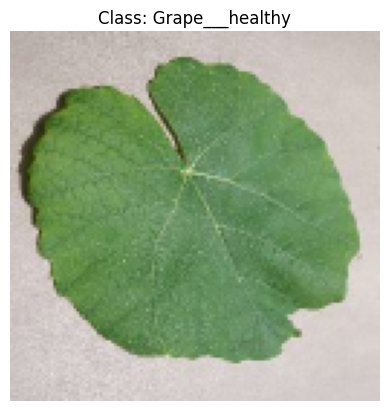

In [ ]:
display_training_leaf_image(50)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def show_batch_with_class_names(data):
    for images, labels in data:
        batch_size = images.shape[0]

        # Create a grid of subplots
        fig, axes = plt.subplots(4, 8, figsize=(30, 30))  # Adjust rows and cols to fit the batch size
        axes = axes.flatten()

        for img, label, ax in zip(images, labels, axes):
            # Find the index of the class with the highest probability in the label
            class_index = tf.argmax(label).numpy()

            # Get the class name
            class_name = class_names[class_index]

            # Convert normalized image back to 0-255
            img = img.numpy()
            img = (img * 255).astype("uint8")  # Rescale back to 0-255

            # Display the image with its class name
            ax.imshow(img)
            ax.set_title(class_name)
            ax.axis('off')  # Hide axes

        plt.tight_layout()
        plt.show()
        break  # Display only the first batch


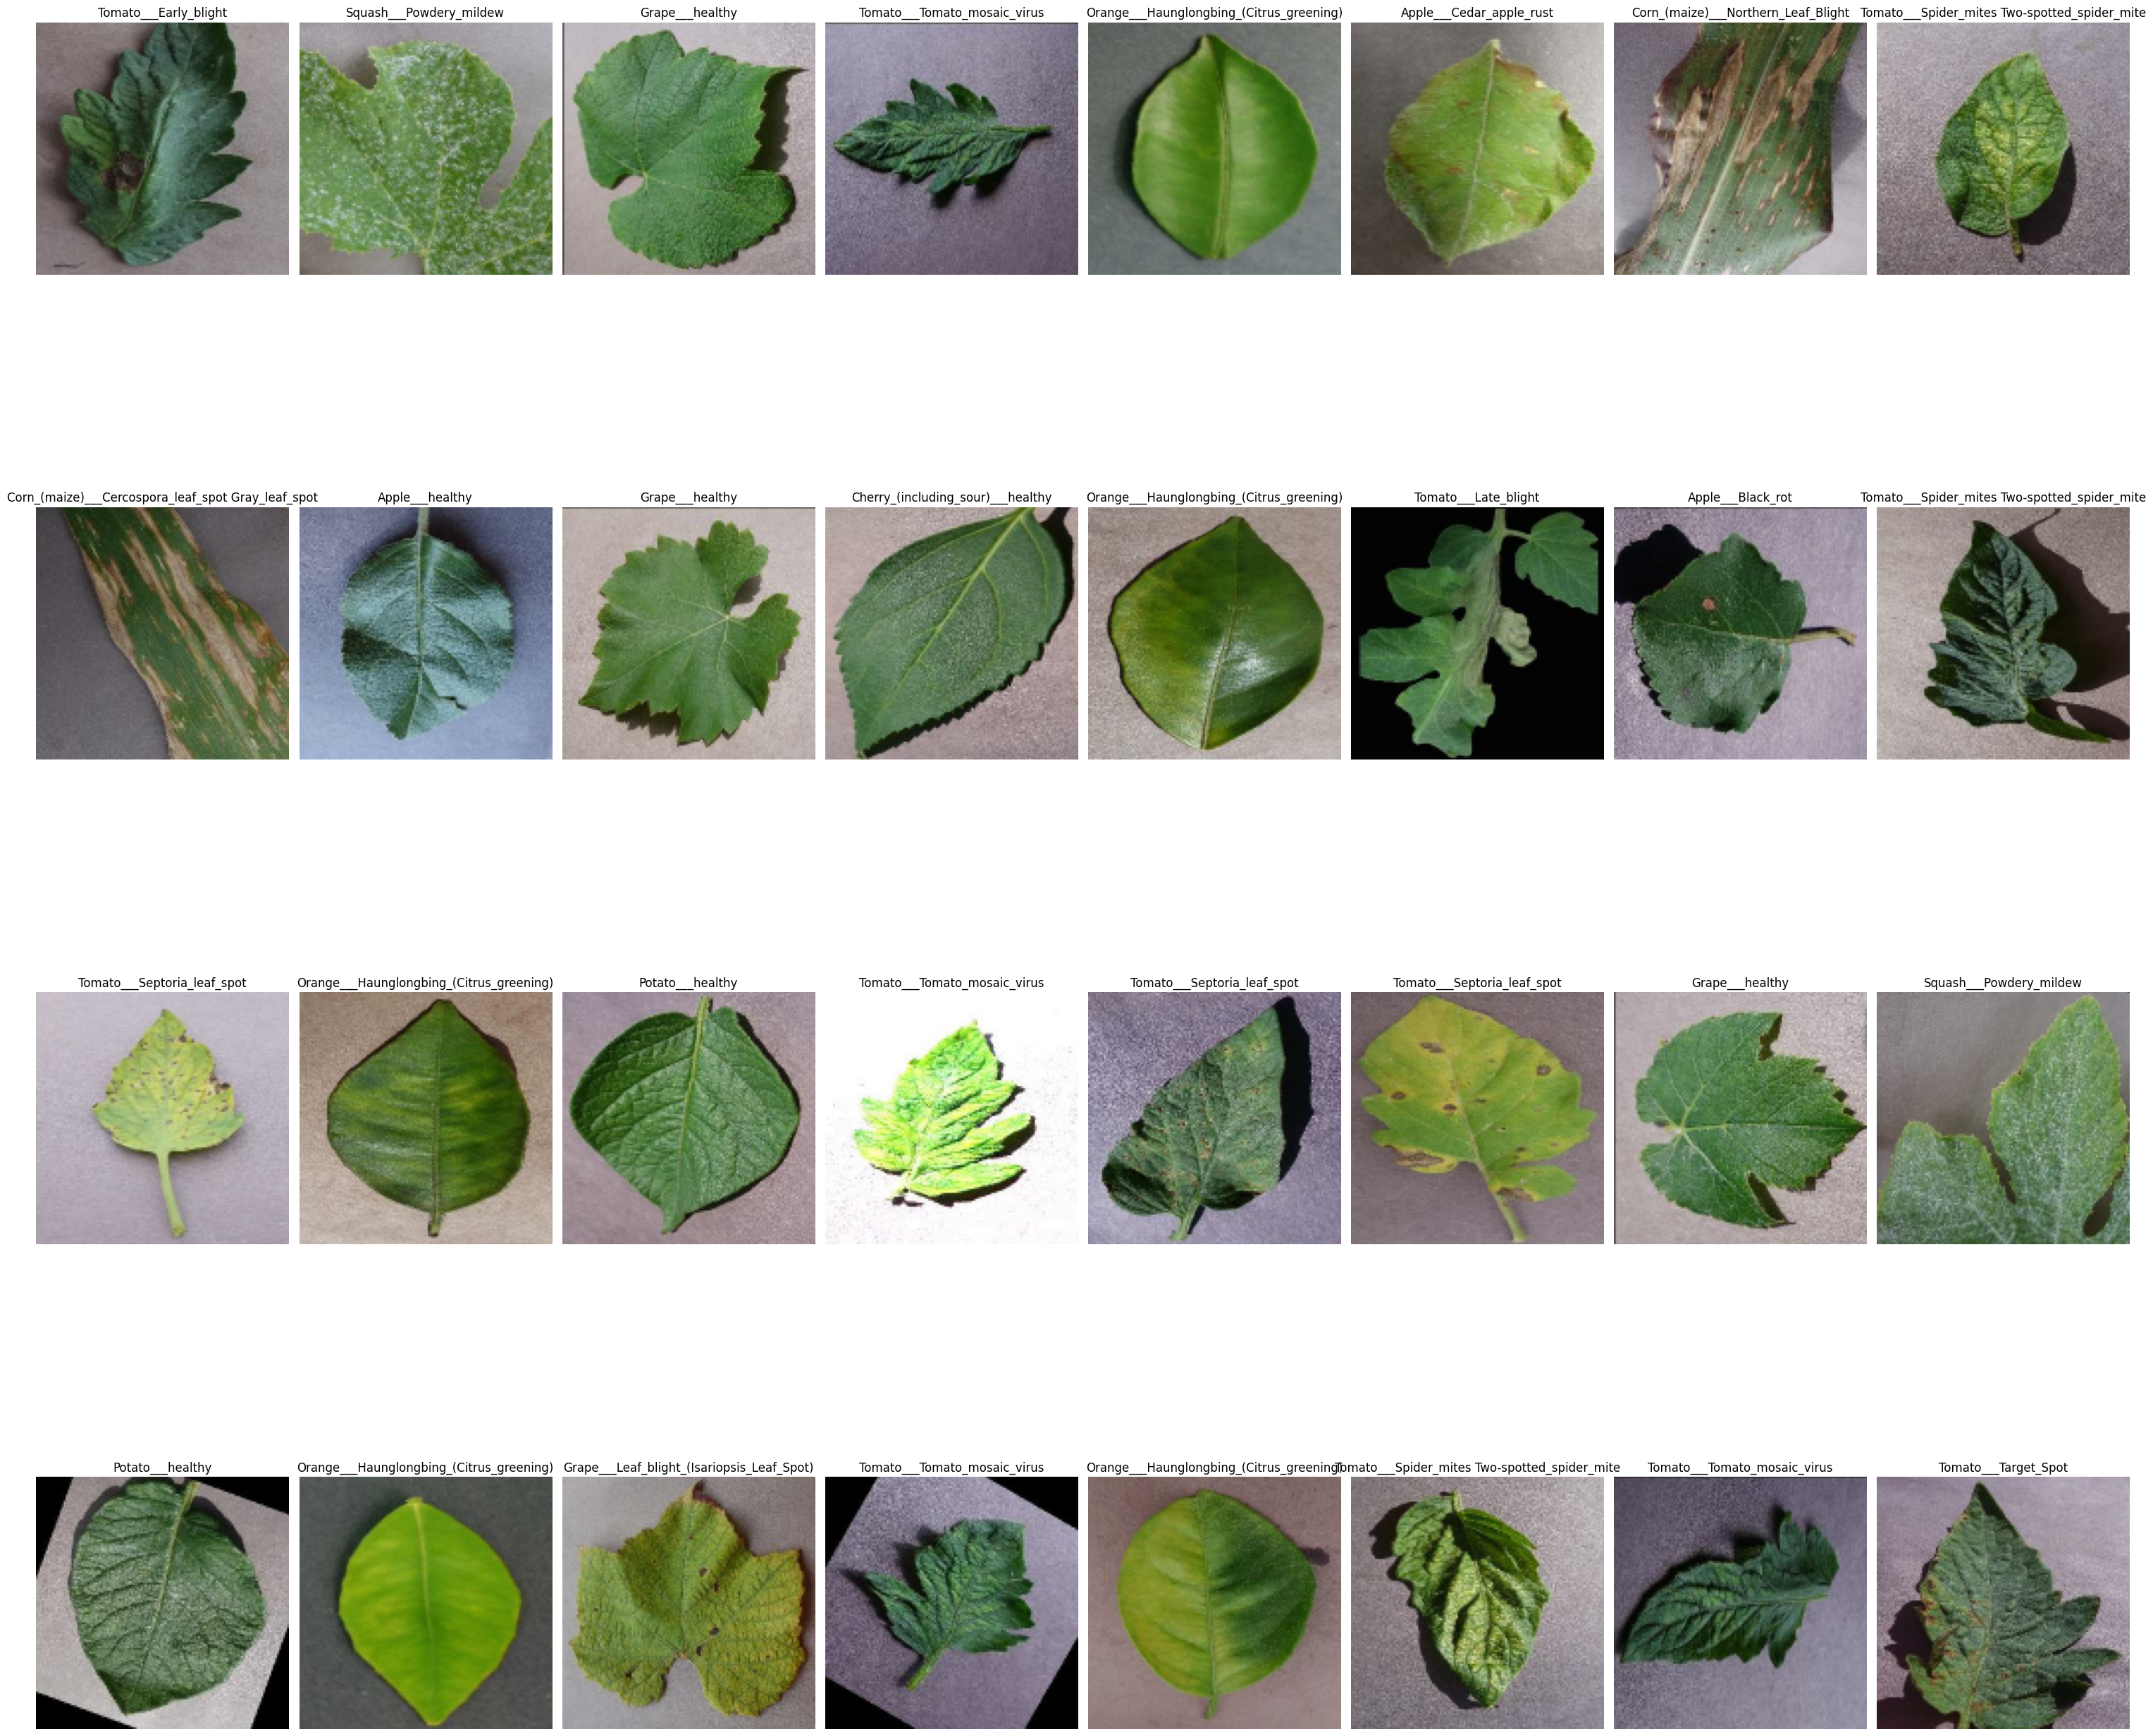

In [ ]:
show_batch_with_class_names(training_set)

In [ ]:
diseases = os.listdir('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train')

In [ ]:
# printing the disease names
print(diseases)

['Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Septoria_leaf_spot', 'Apple___Black_rot', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Apple___Cedar_apple_rust', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Apple___healthy', 'Tomato___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___Black_rot', 'Strawberry___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Pepper,_bell___healthy', 'Apple___Apple_scab', 'Peach___healthy', 'Blueberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___healthy', 'Tomato___Leaf_Mold', 'Soybean___healthy', 'Raspberry___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Target_Spot', 'Potato___healthy', 'Potato___Late_blight', 'Pepper,_bell___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Mea

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [ ]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Grape', 'Potato', 'Cherry_(including_sour)', 'Tomato', 'Apple', 'Squash', 'Corn_(maize)', 'Strawberry', 'Pepper,_bell', 'Peach', 'Blueberry', 'Soybean', 'Raspberry', 'Orange']


In [ ]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


<p>So we have images of leaves of<strong> 14 plants </strong>and while excluding healthy leaves, we have <strong>26 types of images</strong> that show a particular disease in a particular plant.</p>

In [ ]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train' + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class


no. of images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Potato___Early_blight                                        1939
Cherry_(including_sour)___Powdery_mildew                     1683
Tomato___Septoria_leaf_spot                                  1745
Apple___Black_rot                                            1987
Tomato___Bacterial_spot                                      1702
Tomato___Late_blight                                         1851
Apple___Cedar_apple_rust                                     1760
Squash___Powdery_mildew                                      1736
Tomato___Early_blight                                        1920
Apple___healthy                                              2008
Tomato___healthy                                             1926
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Grape___Black_rot                                            1888
Strawberry___healthy                                         1824
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Pepper,_bell___healthy                                       1988
Apple___Apple_scab                                           2016
Peach___healthy                                              1728
Blueberry___healthy                                          1816
Tomato___Spider_mites Two-spotted_spider_mite                1741
Grape___healthy                                              1692
Tomato___Leaf_Mold                                           1882
Soybean___healthy                                            2022
Raspberry___healthy                                          1781
Orange___Haunglongbing_(Citrus_greening)                     2010
Corn_(maize)___healthy                                       1859
Corn_(maize)___Northern_Leaf_Blight                          1908
Tomato___Target_Spot                                         1827
Potato___healthy                                             1824
Potato___Late_blight                                         1939
Pepper,_bell___Bacterial_spot                                1913
Tomato___Tomato_mosaic_virus                                 1790
Corn_(maize)___Common_rust_                                  1907
Grape___Esca_(Black_Measles)                                 1920
Strawberry___Leaf_scorch                                     1774
Cherry_(including_sour)___healthy                            1826
Peach___Bacterial_spot                                       1838

### ***`Visualizing the above information on a graph`***

Text(0.5, 1.0, 'Images per each class of plant disease')

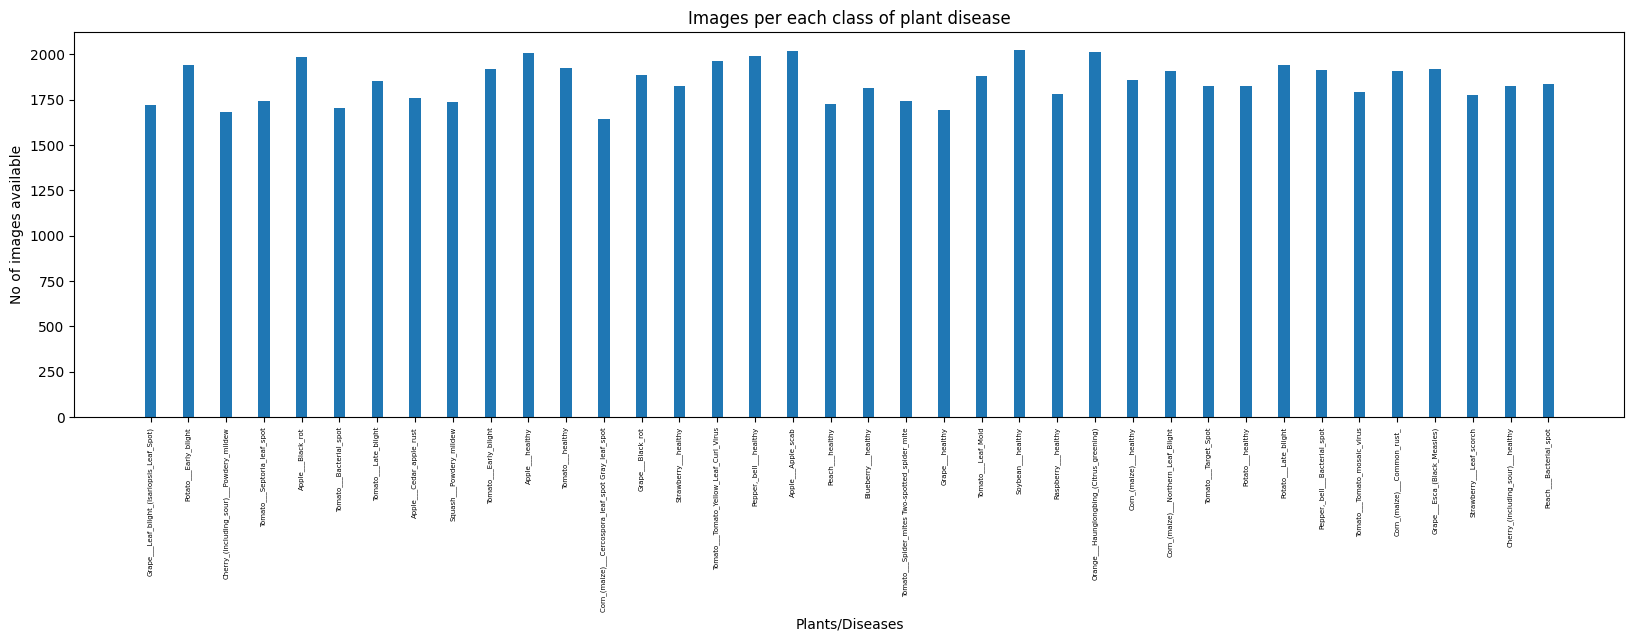

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

<p>We can see that the dataset is<b> Almost balanced for all classes</b>, so we are good to go forward</p>

Image available for training

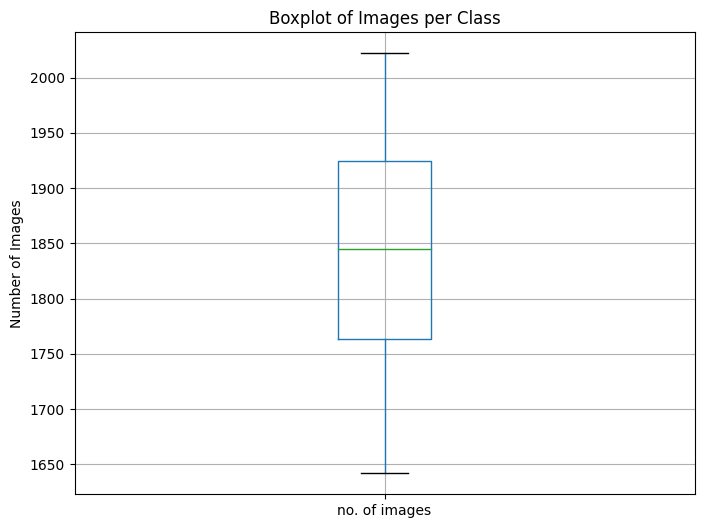

In [ ]:
# Boxplot to identify outliers in the number of images per class
img_per_class.boxplot(figsize=(8, 6))
plt.title("Boxplot of Images per Class")
plt.ylabel("Number of Images")
plt.show()


In [ ]:
print('There are ',img_per_class['no. of images'].sum(),"images avilable for training")


There are  70295 images avilable for training


Code implementation

<h1>To avoid Overshooting </h1>

1.   Choose small learning rate default 0.0001 we are taking 0.0001
2.   There may be chance of underfitting,so increase number of neuron
3.  Add more convolution layer to extract more feature from images there may be posibility that model unable to capture relevent feature or model is confusing due to lack of feature so feedwith more feature






<h1 color='red'>Model Building</h1>

<p><h1 style="color: blue;">Why padding='same' in the First Convolution and padding='valid' in the Second?</h1>

<h2>First Convolution with padding='same':</h2><br>

Reason: In many networks, the first few layers are designed to capture low-level features while preserving spatial dimensions. Using padding='same' helps in retaining the spatial resolution, allowing subsequent layers to operate on a full-size feature map, which can be important for capturing detailed patterns.<br><br>
<h2>Second Convolution with padding='valid':</h2>

Reason: After some initial layers, the network might focus on extracting more complex features where spatial resolution can be reduced without losing essential information. Using padding='valid' reduces the size of the feature maps, which can help in reducing computational load and focusing on higher-level features.</p>

In [ ]:
from tensorflow.keras import layers, regularizers
model = Sequential()
#model.add(layers.InputLayer(input_shape=(128, 128, 3)))  # Define input shape

# Adding convolutional and pooling layers
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=[128,128,3]))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))
# Adding 2nd convolutional and pooling layers
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

# Adding convolutional and pooling layers
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='valid',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=2, strides=2))

#adding dense layers
model.add(Dropout(0.25))#to avoid overfitting
model.add(Flatten())

model.add(Dense(units=900,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(units=700,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
#output layer
model.add(Dense(units=38,activation='softmax'))




In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2, 2, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,835,230 (22.26 MB)

 Trainable params: 5,833,246 (22.25 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use the non-legacy Adam optimizer
    loss='categorical_crossentropy',  # Correct loss function name
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',             # Metric to monitor
    patience=5,                     # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True       # Restore model weights from the epoch with the best value of the monitored metric
)


<h1>without regularization</h1>

In [ ]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=15,
    callbacks=[early_stopping])

Epoch 1/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 146s 67ms/step - accuracy: 0.6561 - loss: 1.1415 - val_accuracy: 0.8960 - val_loss: 0.3215
Epoch 2/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 0.8825 - loss: 0.3646 - val_accuracy: 0.8878 - val_loss: 0.3337
Epoch 3/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 58ms/step - accuracy: 0.9280 - loss: 0.2206 - val_accuracy: 0.9554 - val_loss: 0.1372
Epoch 4/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.9495 - loss: 0.1514 - val_accuracy: 0.9335 - val_loss: 0.2059
Epoch 5/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 0.9654 - loss: 0.1041 - val_accuracy: 0.9668 - val_loss: 0.1042
Epoch 6/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9707 - loss: 0.0884 - val_accuracy: 0.9549 - val_loss: 0.1402
Epoch 7/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.9782 - loss: 0.0652 - val_accuracy: 0.9582 - val_loss: 0.1320
Epoch 8/15
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 129s 59ms/step - accuracy: 

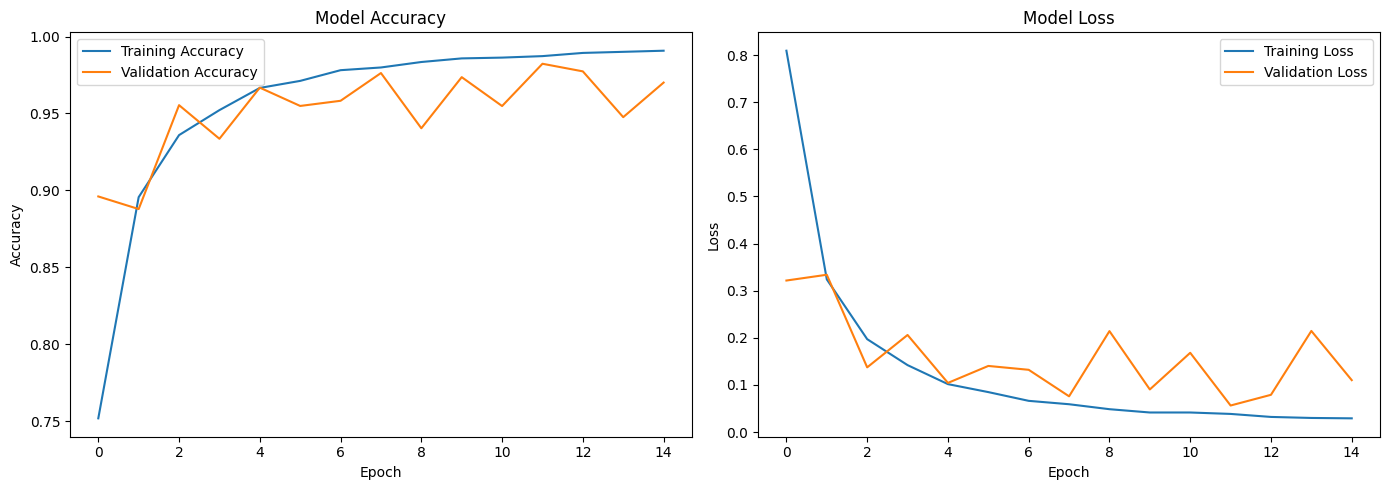

In [ ]:
import matplotlib.pyplot as plt

# Extract history data
history_dict = training_history.history

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


<h1>Regularization Technique</h1>

In [ ]:
training_history2=model.fit(x=training_set,validation_data=validation_set,epochs=13,
    callbacks=[early_stopping])

ValueError: You must call `compile()` before using the model.

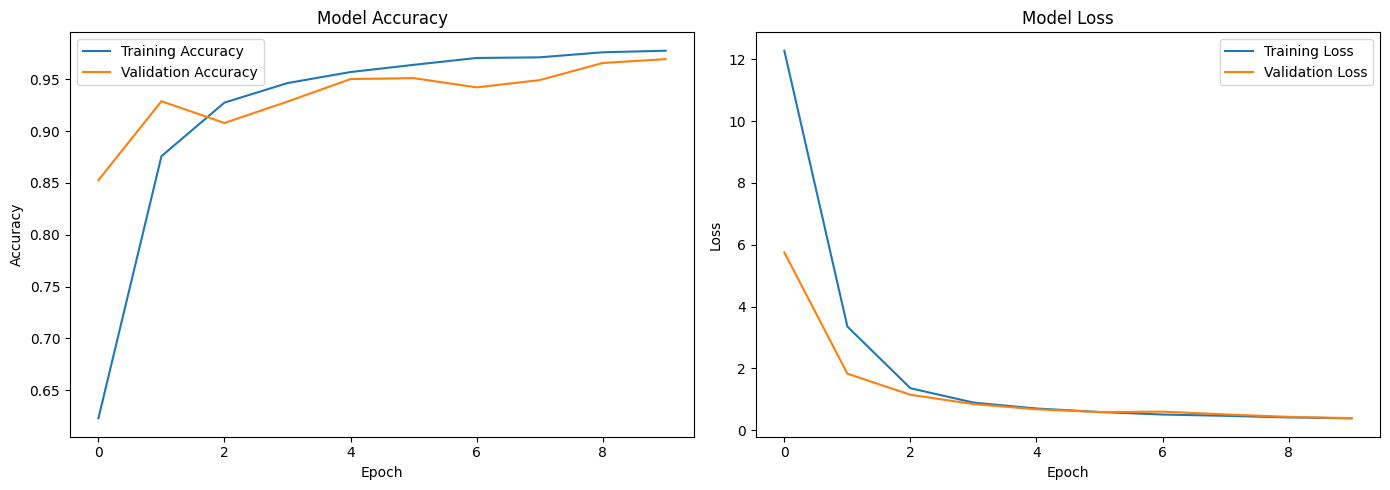

In [ ]:
import matplotlib.pyplot as plt

# Extract history data
history_dict = training_history2.history

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


<h1>Hyperparameter tuning on  num of dence layers </h1>

In [ ]:
def build_model(hp):
    model2 = models.Sequential()

    model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=[128,128,3]))
    model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D(pool_size=2, strides=2))
# Adding 2nd convolutional and pooling layers
    model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D(pool_size=2, strides=2))

# Adding convolutional and pooling layers
    model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D(pool_size=2, strides=2))

    model2.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D(pool_size=2, strides=2))

    model2.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='valid',kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model2.add(layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
    model2.add(layers.BatchNormalization())
    model2.add(layers.MaxPooling2D(pool_size=2, strides=2))

#adding dense layers
    model2.add(Dropout(0.25))#to avoid overfitting
    model2.add(Flatten())

    # Tuning Dense Layers
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model2.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=800, max_value=1500, step=150),
            activation='relu'
        ))
        model2.add(layers.Dropout(
            rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)
        ))

    # Output Layer
    model2.add(layers.Dense(38, activation='softmax'))  # Assuming 38 classes for plant diseases

    # Tuning Optimizer
    model2.compile(
        optimizer=tf.keras.optimizers.Adam( learning_rate=hp.choice('learning_rate':,[1e-3,1e-2,1e-4])
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model2

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras_tuner import RandomSearch

# Make sure 'model' is not defined as a variable before this line
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Try 5 different sets of hyperparameters
    executions_per_trial=1,  # Average results over 2 executions
    directory='my_dir',
    project_name='tune_dense_layers'
)

In [ ]:
tuner.search(training_set, validation_data=validation_set, epochs=9)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
2                 |2                 |num_dense_layers
652               |652               |units_0
0.4               |0.4               |dropout_0
rmsprop           |rmsprop           |optimizer

Epoch 1/10
 156/2197 [=>............................] - ETA: 15:08 - loss: 5.6232 - accuracy: 0.0903